# 序列预测详解

## 📋 文档说明

本文档是序列预测的详细理论讲解，比父目录的《动作执行基础详解》更加深入和详细。本文档将深入讲解序列预测的原理、数学推导和实现细节。通过本文档，你将能够：

1. **深入理解序列预测的原理**：从多模态特征到动作序列的完整流程
2. **掌握序列预测的数学原理**：理解自回归预测、序列模型的数学定义、为什么有效、如何实现
3. **理解序列模型架构**：理解如何使用RNN、LSTM、Transformer实现序列预测
4. **掌握序列损失函数**：理解序列损失函数的数学原理和优化方法
5. **掌握序列预测在VLA中的应用**：理解序列预测在VLA模型中的具体应用和优势

**学习方式**：本文件是Jupyter Notebook格式，你可以边看边运行代码，通过可视化图表和数学推导更好地理解序列预测的原理和过程。

**文档结构**：
- 父目录：动作执行基础详解（见../../理论笔记/动作执行基础详解.ipynb）
- 本文档：序列预测详解（本文档）

---

## 📚 术语表（按出现顺序）

### 1. 序列预测 (Sequence Prediction)
- **中文名称**：序列预测
- **英文全称**：Sequence Prediction
- **定义**：序列预测是指使用序列模型预测动作序列的方法，是动作序列处理的核心技术。序列预测的目标是根据输入特征（如多模态特征）预测应该执行的动作序列。序列预测的方法包括自回归预测、非自回归预测等。序列预测的优势在于：1）捕获时序依赖：能够捕获动作之间的时序依赖关系；2）逐步生成：能够逐步生成动作序列，适合序列生成任务；3）灵活预测：能够根据输入特征灵活预测动作序列；4）端到端训练：能够与VLA模型的其他模块一起端到端训练。序列预测的劣势在于：1）计算复杂度：序列预测需要逐步生成，计算复杂度较高；2）误差累积：预测误差会累积，可能导致序列质量下降。序列预测的数学表示为：$A = [a_1, a_2, \ldots, a_T] = f(s)$，其中$s$是多模态特征，$f(\cdot)$是序列模型，$A$是预测的动作序列。序列预测在VLA中的应用包括预测动作序列，生成连续的动作步骤，完成复杂任务等。序列预测是VLA动作预测的重要方法，通过序列预测，VLA模型能够从多模态特征中预测动作序列，从而完成需要多个步骤的复杂任务。序列预测的质量直接影响VLA模型的性能，好的序列预测能够帮助模型更准确地预测动作序列，提高任务完成率。在VLA训练过程中，序列预测通常与序列编码一起使用，通过端到端训练学习最适合任务的特征表示。
- **核心组成**：序列预测的核心组成包括：1）输入特征：接收多模态特征作为输入；2）序列模型：使用序列模型（如RNN、LSTM、Transformer）预测动作序列；3）自回归生成：使用自回归方式逐步生成动作序列；4）状态更新：更新内部状态，用于预测下一个动作；5）损失计算：计算每个时间步的损失，用于训练模型；6）序列评估：评估预测序列的质量，如任务完成率、动作效率等。序列预测通常使用序列模型实现，如RNN、LSTM、Transformer等，这些模型能够处理变长序列，捕获时序依赖关系。序列预测的设计需要考虑序列长度、模型架构、损失函数等因素，以平衡预测准确性和计算复杂度。
- **在VLA中的应用**：在VLA中，序列预测用于预测动作序列，生成连续的动作步骤。例如，对于"拿起杯子放到桌子上"这个任务，VLA模型使用序列预测方法预测动作序列：根据视觉特征和语言特征，预测"移动到杯子位置"、"抓取杯子"、"移动到桌子位置"、"放下杯子"等动作步骤。序列预测的优势在于能够捕获动作之间的时序依赖关系，这对于完成复杂任务非常重要。在VLA训练过程中，序列预测通常与序列编码一起使用，通过端到端训练学习最适合任务的特征表示。序列预测的结果可以作为VLA模型的输出，帮助模型生成正确的动作序列。
- **相关概念**：动作序列、序列编码、自回归、RNN、LSTM、Transformer、时序依赖
- **首次出现位置**：本文档标题
- **深入学习**：参考父目录的[动作执行基础详解](../../理论笔记/动作执行基础详解.ipynb)和[动作序列详解](../../01_动作表示/03_动作序列/理论笔记/动作序列详解.ipynb)
- **直观理解**：想象序列预测就像根据输入信息预测一系列动作，例如，根据"看到桌子上有杯子"和"听到拿起杯子"的指令，预测"移动到杯子位置"、"抓取杯子"、"抬起手臂"等动作序列。在VLA中，序列预测帮助模型根据视觉和语言信息预测动作序列，从而完成复杂任务。序列预测就像根据输入信息预测一系列动作，帮助模型完成复杂任务。

### 2. 自回归预测 (Autoregressive Prediction)
- **中文名称**：自回归预测
- **英文全称**：Autoregressive Prediction
- **定义**：自回归预测是指使用历史值预测当前值的方法，是动作序列预测中最常用的方法。在自回归中，每个动作的预测依赖于之前的所有动作，即$a_t = f(a_{1:t-1}, s)$，其中$a_{1:t-1}$是历史动作，$s$是状态（多模态特征），$f(\cdot)$是预测网络。自回归的优势在于：1）捕获时序依赖：能够捕获动作之间的时序依赖关系；2）逐步生成：能够逐步生成动作序列，适合序列生成任务；3）灵活预测：能够根据历史动作灵活预测下一个动作；4）端到端训练：能够与VLA模型的其他模块一起端到端训练。自回归的劣势在于：1）计算复杂度：自回归需要逐步生成，计算复杂度较高；2）误差累积：预测误差会累积，可能导致序列质量下降。自回归在VLA中的应用包括预测动作序列，生成连续的动作步骤，完成复杂任务等。自回归是序列预测的核心方法，通过自回归，VLA模型能够从历史动作中预测下一个动作，从而生成完整的动作序列。自回归的质量直接影响序列预测的性能，好的自回归能够帮助模型更准确地预测动作序列，提高任务完成率。在VLA训练过程中，自回归通常与序列模型一起使用，通过自回归方式生成动作序列。
- **核心组成**：自回归的核心组成包括：1）历史动作：使用历史动作$a_{1:t-1}$作为输入；2）预测网络：使用预测网络$f(\cdot)$预测当前动作$a_t$；3）状态更新：更新内部状态$h_t$，用于预测下一个动作；4）序列生成：逐步生成动作序列，直到生成完整序列或达到停止条件；5）损失计算：计算每个时间步的损失，用于训练模型；6）序列评估：评估生成序列的质量，如任务完成率、动作效率等。自回归通常使用序列模型实现，如RNN、LSTM、Transformer等，这些模型能够处理变长序列，捕获时序依赖关系。自回归的设计需要考虑历史长度、模型架构、停止条件等因素，以平衡预测准确性和计算复杂度。
- **在VLA中的应用**：在VLA中，自回归用于预测动作序列，生成连续的动作步骤。例如，对于"拿起杯子放到桌子上"这个任务，VLA模型使用自回归方式逐步生成动作序列：首先预测"移动到杯子位置"，然后根据这个动作预测"抓取杯子"，再根据前两个动作预测"移动到桌子位置"，最后根据前三个动作预测"放下杯子"。自回归的优势在于能够捕获动作之间的时序依赖关系，这对于完成复杂任务非常重要。在VLA训练过程中，自回归通常与序列模型一起使用，通过自回归方式生成动作序列。自回归的结果可以作为VLA模型的输出，帮助模型生成正确的动作序列。
- **相关概念**：动作序列、序列预测、RNN、LSTM、Transformer、时序依赖
- **首次出现位置**：本文档第2.1节
- **深入学习**：参考本文档的自回归预测详细讲解部分
- **直观理解**：想象自回归就像根据之前的步骤预测下一步，例如，根据"移动到杯子位置"预测"抓取杯子"，根据"抓取杯子"预测"移动到桌子位置"等。在VLA中，自回归帮助模型逐步生成动作序列，完成复杂任务。自回归就像根据之前的步骤预测下一步，帮助模型生成正确的动作序列。

### 3. RNN (Recurrent Neural Network)
- **中文名称**：循环神经网络
- **英文全称**：Recurrent Neural Network
- **定义**：RNN是指具有循环连接的神经网络，是序列预测中最基础的序列模型。在RNN中，每个时间步的输出依赖于当前输入和上一个时间步的隐藏状态，即$h_t = \tanh(W_h h_{t-1} + W_x x_t + b)$，其中$h_t$是当前隐藏状态，$h_{t-1}$是上一个隐藏状态，$x_t$是当前输入，$W_h, W_x, b$是模型参数。RNN的优势在于：1）处理序列：能够处理变长序列；2）捕获时序依赖：能够捕获短期的时序依赖关系；3）参数共享：所有时间步共享参数，参数效率高；4）简单实现：实现简单，计算效率高。RNN的劣势在于：1）梯度消失：长期依赖关系难以捕获，容易出现梯度消失问题；2）梯度爆炸：可能出现梯度爆炸问题；3）表达能力有限：表达能力相对有限。RNN在VLA中的应用包括序列预测，生成动作序列，完成复杂任务等。RNN是序列预测的基础模型，通过RNN，VLA模型能够从历史动作中预测下一个动作，从而生成完整的动作序列。RNN的质量直接影响序列预测的性能，好的RNN能够帮助模型更准确地预测动作序列，提高任务完成率。在VLA训练过程中，RNN通常与自回归一起使用，通过RNN处理序列信息，生成动作序列。
- **核心组成**：RNN的核心组成包括：1）输入层：接收当前输入$x_t$；2）隐藏层：维护隐藏状态$h_t$，存储历史信息；3）输出层：输出当前预测$y_t$；4）循环连接：将隐藏状态传递给下一个时间步；5）参数共享：所有时间步共享参数；6）激活函数：使用激活函数（如tanh）增加非线性。RNN通常使用全连接层实现，这些层能够处理序列信息，捕获时序依赖关系。RNN的设计需要考虑隐藏状态维度、激活函数、初始化方法等因素，以平衡表达能力和计算复杂度。
- **在VLA中的应用**：在VLA中，RNN用于序列预测，生成动作序列。例如，对于"拿起杯子放到桌子上"这个任务，VLA模型使用RNN处理动作序列，逐步生成动作步骤。RNN的优势在于实现简单、计算效率高，这对于大规模VLA任务非常重要。在VLA训练过程中，RNN通常与自回归一起使用，通过RNN处理序列信息，生成动作序列。RNN的结果可以作为VLA模型的输出，帮助模型生成正确的动作序列。
- **相关概念**：序列预测、自回归、LSTM、Transformer、时序依赖、隐藏状态
- **首次出现位置**：本文档第4.1节
- **深入学习**：参考本文档的RNN详细讲解部分
- **直观理解**：想象RNN就像一个有记忆的机器，能够记住之前的信息，并根据当前输入和记忆预测下一步。例如，RNN能够记住"移动到杯子位置"这个动作，然后根据这个记忆和当前输入预测"抓取杯子"。在VLA中，RNN帮助模型处理序列信息，生成动作序列。RNN就像一个有记忆的机器，帮助模型处理序列信息。

### 4. LSTM (Long Short-Term Memory)
- **中文名称**：长短期记忆网络
- **英文全称**：Long Short-Term Memory
- **定义**：LSTM是指具有门控机制的循环神经网络，是序列预测中常用的序列模型。在LSTM中，通过门控机制（输入门、遗忘门、输出门）控制信息的流动，从而解决RNN的梯度消失问题。LSTM的数学表示为：$h_t, c_t = \text{LSTM}(x_t, h_{t-1}, c_{t-1})$，其中$h_t$是隐藏状态，$c_t$是细胞状态，$x_t$是当前输入。LSTM的优势在于：1）处理长期依赖：能够处理长期依赖关系，解决RNN的梯度消失问题；2）门控机制：通过门控机制控制信息流动，提高表达能力；3）参数共享：所有时间步共享参数，参数效率高；4）广泛应用：在序列任务中广泛应用。LSTM的劣势在于：1）计算复杂度：计算复杂度较高，训练和推理速度较慢；2）参数较多：参数数量较多，需要更多的训练数据。LSTM在VLA中的应用包括序列预测，生成动作序列，完成复杂任务等。LSTM是序列预测的重要模型，通过LSTM，VLA模型能够从历史动作中预测下一个动作，从而生成完整的动作序列。LSTM的质量直接影响序列预测的性能，好的LSTM能够帮助模型更准确地预测动作序列，提高任务完成率。在VLA训练过程中，LSTM通常与自回归一起使用，通过LSTM处理序列信息，生成动作序列。
- **核心组成**：LSTM的核心组成包括：1）输入门：控制新信息的输入；2）遗忘门：控制旧信息的遗忘；3）输出门：控制输出的生成；4）细胞状态：存储长期信息；5）隐藏状态：存储短期信息；6）门控计算：计算各个门的值。LSTM通常使用全连接层实现，这些层能够处理序列信息，捕获长期依赖关系。LSTM的设计需要考虑隐藏状态维度、细胞状态维度、门控机制等因素，以平衡表达能力和计算复杂度。
- **在VLA中的应用**：在VLA中，LSTM用于序列预测，生成动作序列。例如，对于"拿起杯子放到桌子上"这个任务，VLA模型使用LSTM处理动作序列，逐步生成动作步骤。LSTM的优势在于能够处理长期依赖关系，这对于完成复杂任务非常重要。在VLA训练过程中，LSTM通常与自回归一起使用，通过LSTM处理序列信息，生成动作序列。LSTM的结果可以作为VLA模型的输出，帮助模型生成正确的动作序列。
- **相关概念**：序列预测、自回归、RNN、Transformer、时序依赖、门控机制
- **首次出现位置**：本文档第4.2节
- **深入学习**：参考本文档的LSTM详细讲解部分
- **直观理解**：想象LSTM就像一个有选择性记忆的机器，能够选择记住重要的信息，忘记不重要的信息。例如，LSTM能够记住"移动到杯子位置"这个重要动作，忘记一些不重要的中间状态，然后根据这个记忆预测"抓取杯子"。在VLA中，LSTM帮助模型处理长期依赖关系，生成动作序列。LSTM就像一个有选择性记忆的机器，帮助模型处理长期依赖关系。

### 5. 序列损失函数 (Sequence Loss Function)
- **中文名称**：序列损失函数
- **英文全称**：Sequence Loss Function
- **定义**：序列损失函数是指用于训练序列预测模型的损失函数，是序列预测的核心组件。序列损失函数通常是对每个时间步的损失进行求和或平均，即$\mathcal{L} = \sum_{t=1}^{T} \mathcal{L}_t(a_t, \hat{a}_t)$，其中$\mathcal{L}_t$是每个时间步的损失函数，$a_t$是预测动作，$\hat{a}_t$是真实动作，$T$是序列长度。序列损失函数的优势在于：1）逐步优化：能够逐步优化每个时间步的预测；2）捕获时序依赖：能够捕获动作之间的时序依赖关系；3）端到端训练：能够与VLA模型的其他模块一起端到端训练；4）灵活设计：能够根据任务特点设计不同的损失函数。序列损失函数的劣势在于：1）误差累积：预测误差会累积，可能导致序列质量下降；2）计算复杂度：计算复杂度较高，需要计算每个时间步的损失。序列损失函数在VLA中的应用包括训练序列预测模型，优化动作序列预测，完成复杂任务等。序列损失函数是序列预测的核心组件，通过序列损失函数，VLA模型能够学习正确的动作序列预测，从而完成需要多个步骤的复杂任务。序列损失函数的质量直接影响序列预测的性能，好的序列损失函数能够帮助模型更准确地预测动作序列，提高任务完成率。在VLA训练过程中，序列损失函数通常与序列模型一起使用，通过端到端训练学习最适合任务的特征表示。
- **核心组成**：序列损失函数的核心组成包括：1）时间步损失：计算每个时间步的损失$\mathcal{L}_t$；2）损失聚合：对所有时间步的损失进行求和或平均；3）权重调整：对不同时间步的损失进行权重调整（可选）；4）正则化：添加正则化项防止过拟合（可选）；5）梯度计算：计算损失函数的梯度，用于反向传播；6）优化更新：使用优化算法更新模型参数。序列损失函数通常使用交叉熵损失（离散动作）或均方误差损失（连续动作）作为每个时间步的损失函数。序列损失函数的设计需要考虑损失类型、权重调整、正则化等因素，以平衡预测准确性和计算复杂度。
- **在VLA中的应用**：在VLA中，序列损失函数用于训练序列预测模型，优化动作序列预测。例如，对于"拿起杯子放到桌子上"这个任务，VLA模型使用序列损失函数训练序列预测模型，优化每个时间步的动作预测。序列损失函数的优势在于能够逐步优化每个时间步的预测，这对于完成复杂任务非常重要。在VLA训练过程中，序列损失函数通常与序列模型一起使用，通过端到端训练学习最适合任务的特征表示。序列损失函数的结果可以作为VLA模型的训练目标，帮助模型学习正确的动作序列预测。
- **相关概念**：序列预测、自回归、交叉熵损失、均方误差损失、梯度下降
- **首次出现位置**：本文档第5.1节
- **深入学习**：参考本文档的序列损失函数详细讲解部分
- **直观理解**：想象序列损失函数就像衡量整个动作序列预测的准确性，例如，衡量"移动到杯子位置"、"抓取杯子"、"移动到桌子位置"、"放下杯子"这个序列的预测准确性。在VLA中，序列损失函数帮助模型学习正确的动作序列预测，从而完成复杂任务。序列损失函数就像衡量整个动作序列预测的准确性，帮助模型学习正确的动作序列预测。

---

## 📋 概述

### 什么是序列预测

序列预测是指使用序列模型预测动作序列的方法，是动作序列处理的核心技术。序列预测的目标是根据输入特征（如多模态特征）预测应该执行的动作序列。

### 为什么重要

序列预测对于VLA学习非常重要，原因包括：

1. **捕获时序依赖**：能够捕获动作之间的时序依赖关系
2. **逐步生成**：能够逐步生成动作序列，适合序列生成任务
3. **灵活预测**：能够根据输入特征灵活预测动作序列
4. **端到端训练**：能够与VLA模型的其他模块一起端到端训练

### 学习目标

通过本文档的学习，你将能够：

1. **深入理解序列预测**：理解序列预测的原理和方法
2. **掌握自回归预测**：理解自回归预测的数学原理和实现方法
3. **理解序列模型**：理解RNN、LSTM、Transformer等序列模型的原理和实现
4. **掌握序列预测在VLA中的应用**：理解序列预测在VLA模型中的具体应用

---


In [1]:
# ============================================
# 导入必要的库
# ============================================
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.decomposition import PCA
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
plt.style.use('seaborn-v0_8-darkgrid')
print("环境准备完成！")


环境准备完成！


## 1. 序列预测的基本原理

### 1.1 什么是序列预测

**直观理解**：想象序列预测就像根据输入信息预测一系列动作，例如，根据"看到桌子上有杯子"和"听到拿起杯子"的指令，预测"移动到杯子位置"、"抓取杯子"、"抬起手臂"等动作序列。

**定义**：序列预测是指使用序列模型预测动作序列的方法，是动作序列处理的核心技术。

### 1.2 序列预测的数学表示

序列预测的数学表示为：

$$A = [a_1, a_2, \ldots, a_T] = f(s)$$

其中：
- $s \in \mathbb{R}^{d}$是多模态特征
- $f(\cdot)$是序列模型
- $A$是预测的动作序列
- $T$是序列长度

### 1.3 序列预测的流程

序列预测的流程包括：

1. **特征输入**：接收多模态特征$s$
2. **序列模型**：使用序列模型$f(\cdot)$处理特征
3. **自回归生成**：使用自回归方式逐步生成动作序列
4. **状态更新**：更新内部状态，用于预测下一个动作
5. **序列输出**：输出预测的动作序列$A$

### 1.4 序列预测 vs 单步预测

| 特性 | 序列预测 | 单步预测 |
|------|---------|---------|
| **输出类型** | 动作序列 | 单个动作 |
| **时序依赖** | 捕获时序依赖 | 不捕获时序依赖 |
| **适用场景** | 复杂任务 | 简单任务 |
| **计算复杂度** | 较高 | 较低 |

---

## 2. 为什么需要序列预测

### 2.1 序列预测的优势

序列预测的优势包括：

1. **捕获时序依赖**：
   - 能够捕获动作之间的时序依赖关系
   - 能够理解动作的正确执行顺序
   - 例如，理解"抓取杯子"必须在"移动到杯子位置"之后

2. **逐步生成**：
   - 能够逐步生成动作序列，适合序列生成任务
   - 能够根据历史动作灵活预测下一个动作
   - 例如，根据前两个动作预测第三个动作

3. **端到端训练**：
   - 能够与VLA模型的其他模块一起端到端训练
   - 能够学习最适合任务的特征表示
   - 能够优化整体性能

4. **处理复杂任务**：
   - 能够处理需要多个步骤的复杂任务
   - 能够生成长期的动作序列
   - 适合复杂的VLA任务

### 2.2 序列预测的适用场景

**适合使用序列预测的场景**：

1. **复杂任务**：
   - 任务需要多个步骤
   - 动作之间有明确的时序依赖关系
   - 需要生成长期的动作序列

2. **多步骤操作**：
   - 操作需要多个步骤（如"拿起杯子放到桌子上"）
   - 每个步骤依赖于前面的步骤
   - 适合使用序列预测

3. **长期规划**：
   - 需要长期的动作规划
   - 需要预测未来多个时间步的动作
   - 适合使用序列预测

---

## 3. 自回归预测详解

### 3.1 什么是自回归预测

**直观理解**：想象自回归预测就像根据之前的步骤预测下一步，例如，根据"移动到杯子位置"预测"抓取杯子"，根据"抓取杯子"预测"移动到桌子位置"等。

**定义**：自回归预测是指使用历史值预测当前值的方法，是动作序列预测中最常用的方法。

### 3.2 为什么需要自回归预测

自回归预测的必要性在于：

1. **捕获时序依赖**：
   - 能够捕获动作之间的时序依赖关系
   - 能够理解动作的正确执行顺序
   - 例如，理解"抓取杯子"必须在"移动到杯子位置"之后

2. **逐步生成**：
   - 能够逐步生成动作序列，适合序列生成任务
   - 能够根据历史动作灵活预测下一个动作
   - 例如，根据前两个动作预测第三个动作

3. **端到端训练**：
   - 能够与VLA模型的其他模块一起端到端训练
   - 能够学习最适合任务的特征表示
   - 能够优化整体性能

### 3.3 自回归预测的数学推导详解

#### 3.3.1 从基础数学开始

**步骤1：理解条件概率**

条件概率是指事件$A$在事件$B$发生的条件下发生的概率：

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

**步骤2：理解序列概率**

序列概率是指序列$S = [s_1, s_2, \ldots, s_T]$的联合概率：

$$P(S) = P(s_1, s_2, \ldots, s_T)$$

**步骤3：理解链式法则**

链式法则将联合概率分解为条件概率的乘积：

$$P(S) = P(s_1) \prod_{t=2}^{T} P(s_t|s_{1:t-1})$$

**步骤4：理解自回归预测**

自回归预测使用历史动作预测当前动作：

$$a_t = f(a_{1:t-1}, s)$$

其中：
- $a_{1:t-1}$是历史动作
- $s$是状态（多模态特征）
- $f(\cdot)$是预测网络

#### 3.3.2 自回归预测的具体计算示例

**示例：自回归预测动作序列**

假设：
- 任务："拿起杯子放到桌子上"
- 多模态特征：$s \in \mathbb{R}^{128}$
- 预测网络：$f(\cdot)$（简化版）

**步骤1：预测第一个动作**

$$a_1 = f(\emptyset, s) = f(s)$$

假设预测结果为：$a_1 = $"移动到杯子位置"

**步骤2：预测第二个动作**

$$a_2 = f(a_1, s)$$

假设预测结果为：$a_2 = $"抓取杯子"

**步骤3：预测第三个动作**

$$a_3 = f(a_{1:2}, s) = f([a_1, a_2], s)$$

假设预测结果为：$a_3 = $"移动到桌子位置"

**步骤4：预测第四个动作**

$$a_4 = f(a_{1:3}, s) = f([a_1, a_2, a_3], s)$$

假设预测结果为：$a_4 = $"放下杯子"

**步骤5：生成完整序列**

最终的动作序列为：

$$A = [a_1, a_2, a_3, a_4] = ["移动到杯子位置", "抓取杯子", "移动到桌子位置", "放下杯子"]$$

### 3.4 自回归预测的可视化

下面我们通过代码可视化自回归预测的过程：


C:\Users\Upsin\AppData\Local\Temp\ipykernel_27436\405118502.py:119: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_27436\405118502.py:119: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_27436\405118502.py:119: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_27436\405118502.py:119: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_27436\405118502.py:119: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_27436\405118502.py:119: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B})

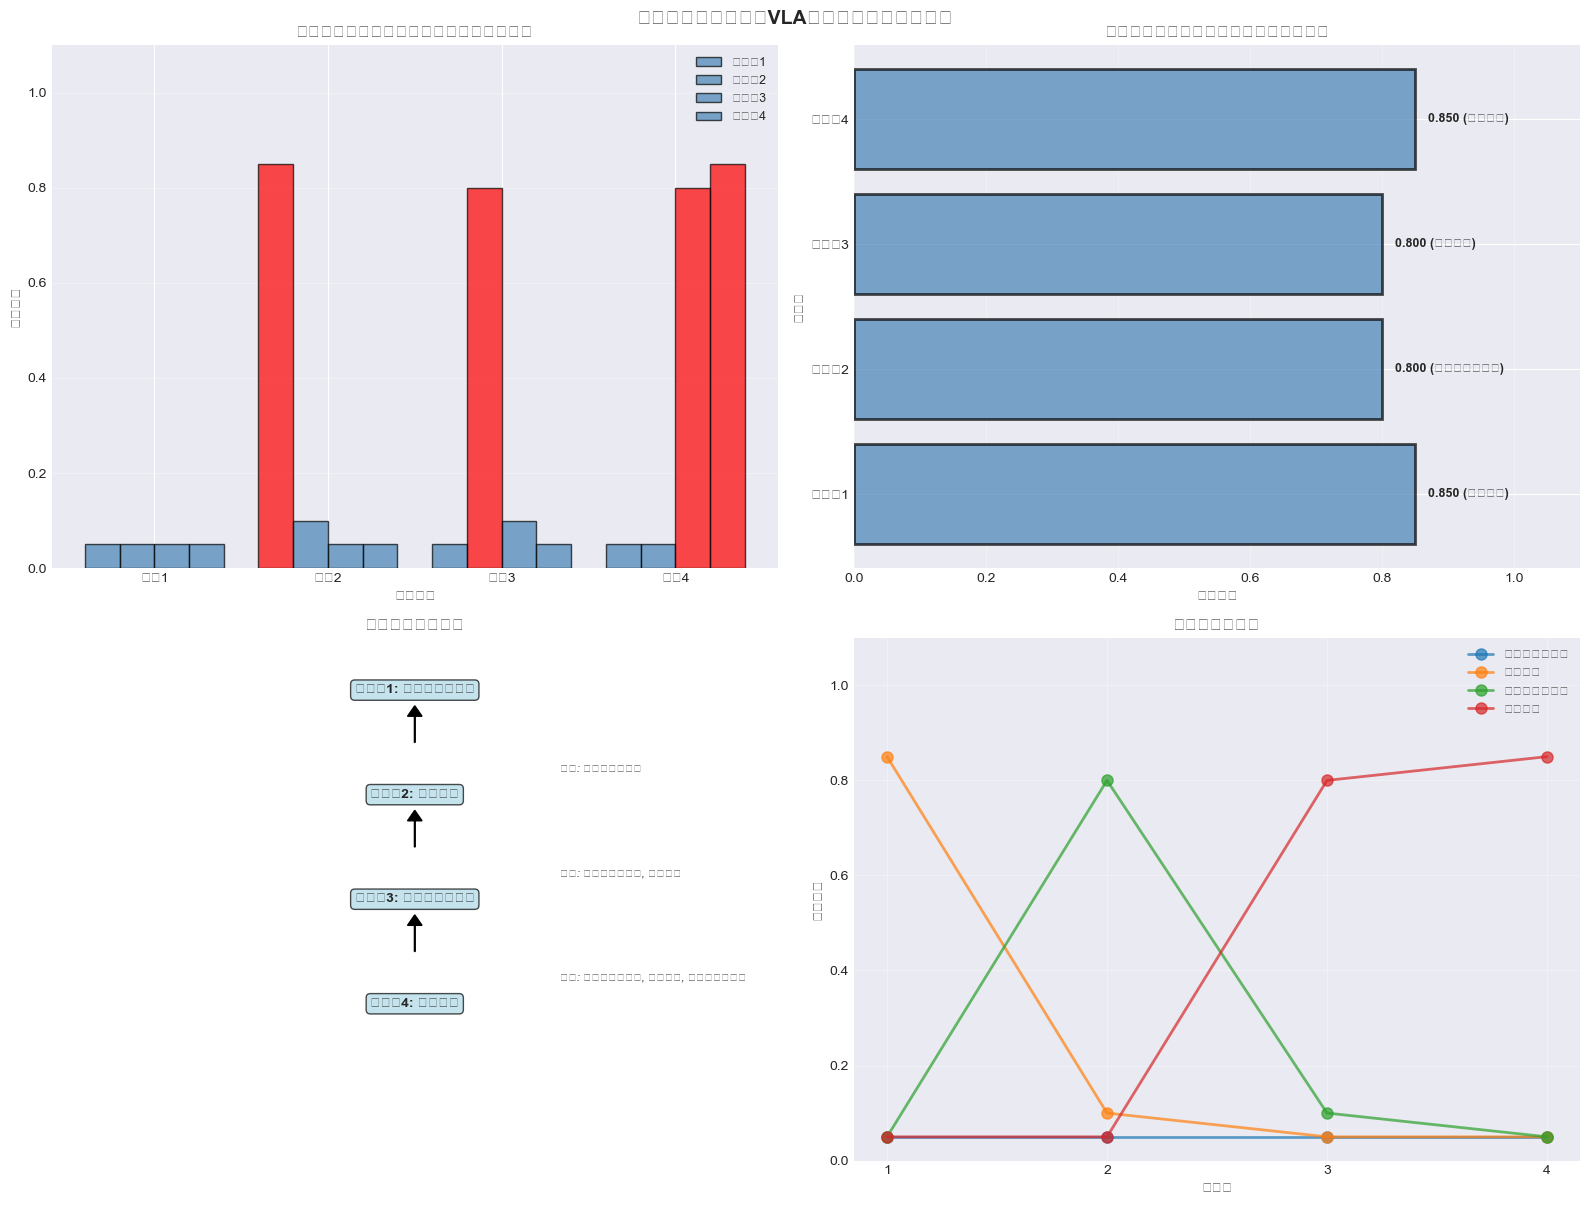

自回归预测可视化说明：
1. 左上：自回归预测过程，显示每个时间步的预测概率分布
2. 右上：预测动作序列，显示每个时间步的最高概率动作
3. 左下：自回归依赖关系图，显示动作之间的依赖关系
4. 右下：预测置信度演化，显示每个动作的预测概率随时间步的变化


In [2]:
# ============================================
# 自回归预测可视化（示例：VLA任务的自回归动作预测）
# ============================================
np.random.seed(42)

# 示例：VLA任务"拿起杯子放到桌子上"
task_name = "拿起杯子放到桌子上"
action_sequence = [
    '移动到杯子位置',
    '抓取杯子',
    '移动到桌子位置',
    '放下杯子',
]
sequence_length = len(action_sequence)

# 模拟自回归预测过程
# 每个动作的预测概率（简化版）
action_probs_history = []
for t in range(sequence_length):
    # 模拟预测概率（根据历史动作调整）
    if t == 0:
        # 第一个动作：基于多模态特征
        probs = np.array([0.05, 0.85, 0.05, 0.05])  # 高概率预测"移动到杯子位置"
    elif t == 1:
        # 第二个动作：基于第一个动作
        probs = np.array([0.05, 0.10, 0.80, 0.05])  # 高概率预测"抓取杯子"
    elif t == 2:
        # 第三个动作：基于前两个动作
        probs = np.array([0.05, 0.05, 0.10, 0.80])  # 高概率预测"移动到桌子位置"
    else:
        # 第四个动作：基于前三个动作
        probs = np.array([0.05, 0.05, 0.05, 0.85])  # 高概率预测"放下杯子"
    
    # 归一化
    probs = probs / probs.sum()
    action_probs_history.append(probs)

# 可视化
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 左上：自回归预测过程（每个时间步的预测概率）
ax1 = axes[0, 0]
x_pos = np.arange(sequence_length)
width = 0.2
for t in range(sequence_length):
    predicted_idx = np.argmax(action_probs_history[t])
    colors = ['red' if i == predicted_idx else 'steelblue' for i in range(sequence_length)]
    bars = ax1.bar(x_pos + t * width, action_probs_history[t], width, 
                  color=colors, alpha=0.7, edgecolor='black', linewidth=1,
                  label=f'时间步{t+1}')
ax1.set_title('自回归预测过程（每个时间步的预测概率）', fontsize=12, fontweight='bold')
ax1.set_xlabel('动作索引')
ax1.set_ylabel('预测概率')
ax1.set_xticks(x_pos + width * 1.5)
ax1.set_xticklabels([f'动作{i+1}' for i in range(sequence_length)])
ax1.set_ylim(0, 1.1)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3, axis='y')

# 右上：预测动作序列
ax2 = axes[0, 1]
y_pos = np.arange(sequence_length)
predicted_actions = [action_sequence[np.argmax(probs)] for probs in action_probs_history]
probs_max = [np.max(probs) for probs in action_probs_history]
bars = ax2.barh(y_pos, probs_max, color='steelblue', alpha=0.7, 
               edgecolor='black', linewidth=2)
ax2.set_title('预测动作序列（每个时间步的最高概率）', fontsize=12, fontweight='bold')
ax2.set_xlabel('预测概率')
ax2.set_ylabel('时间步')
ax2.set_yticks(y_pos)
ax2.set_yticklabels([f'时间步{t+1}' for t in range(sequence_length)])
ax2.set_xlim(0, 1.1)
ax2.grid(True, alpha=0.3, axis='x')

# 添加数值标注和动作名称
for i, (bar, prob, action) in enumerate(zip(bars, probs_max, predicted_actions)):
    width_bar = bar.get_width()
    ax2.text(width_bar + 0.02, bar.get_y() + bar.get_height()/2,
            f'{prob:.3f} ({action})', ha='left', va='center', 
            fontsize=9, fontweight='bold')

# 左下：自回归依赖关系图
ax3 = axes[1, 0]
ax3.axis('off')
# 绘制自回归依赖关系
for t in range(sequence_length):
    y_pos = 0.9 - t * 0.2
    # 绘制当前时间步
    ax3.text(0.5, y_pos, f'时间步{t+1}: {action_sequence[t]}', 
            ha='center', va='center', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    # 绘制依赖箭头
    if t > 0:
        ax3.arrow(0.5, y_pos + 0.1, 0, 0.05, head_width=0.02, head_length=0.02, 
                 fc='black', ec='black')
        # 绘制依赖文本
        ax3.text(0.7, y_pos + 0.05, f'依赖: {", ".join(action_sequence[:t])}', 
                ha='left', va='center', fontsize=8, style='italic')

ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.set_title('自回归依赖关系图', fontsize=12, fontweight='bold')

# 右下：预测置信度演化
ax4 = axes[1, 1]
time_steps = np.arange(1, sequence_length + 1)
for i in range(sequence_length):
    probs_over_time = [probs[i] for probs in action_probs_history]
    ax4.plot(time_steps, probs_over_time, marker='o', linewidth=2, 
            markersize=8, label=action_sequence[i], alpha=0.7)
ax4.set_title('预测置信度演化', fontsize=12, fontweight='bold')
ax4.set_xlabel('时间步')
ax4.set_ylabel('预测概率')
ax4.set_xticks(time_steps)
ax4.set_ylim(0, 1.1)
ax4.legend(fontsize=9, loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('自回归预测可视化：VLA任务的自回归动作预测', fontsize=14, fontweight='bold', y=1.0)
plt.show()

print("=" * 60)
print("自回归预测可视化说明：")
print("=" * 60)
print("1. 左上：自回归预测过程，显示每个时间步的预测概率分布")
print("2. 右上：预测动作序列，显示每个时间步的最高概率动作")
print("3. 左下：自回归依赖关系图，显示动作之间的依赖关系")
print("4. 右下：预测置信度演化，显示每个动作的预测概率随时间步的变化")
print("=" * 60)


---

## 4. RNN序列模型详解

### 4.1 什么是RNN

**直观理解**：想象RNN就像一个有记忆的机器，能够记住之前的信息，并根据当前输入和记忆预测下一步。

**定义**：RNN是指具有循环连接的神经网络，是序列预测中最基础的序列模型。

### 4.2 为什么需要RNN

RNN的必要性在于：

1. **处理序列**：
   - 能够处理变长序列
   - 能够捕获短期的时序依赖关系
   - 适合序列预测任务

2. **参数共享**：
   - 所有时间步共享参数，参数效率高
   - 能够学习序列模式
   - 适合大规模序列任务

3. **简单实现**：
   - 实现简单，计算效率高
   - 适合快速原型开发
   - 适合大规模VLA任务

### 4.3 RNN的数学推导详解

#### 4.3.1 从基础数学开始

**步骤1：理解隐藏状态**

隐藏状态是指存储历史信息的向量：

$$h_t \in \mathbb{R}^{d_h}$$

其中$d_h$是隐藏状态维度。

**步骤2：理解循环连接**

循环连接是指将隐藏状态传递给下一个时间步：

$$h_t = f(h_{t-1}, x_t)$$

其中$f(\cdot)$是循环函数。

**步骤3：理解RNN**

RNN的数学表示为：

$$h_t = \tanh(W_h h_{t-1} + W_x x_t + b)$$

其中：
- $h_t$是当前隐藏状态
- $h_{t-1}$是上一个隐藏状态
- $x_t$是当前输入
- $W_h, W_x, b$是模型参数

**步骤4：理解输出**

输出是隐藏状态的线性变换：

$$y_t = W_o h_t + b_o$$

其中$W_o, b_o$是输出层参数。

#### 4.3.2 RNN的具体计算示例

**示例：RNN计算**

假设：
- 隐藏状态维度：$d_h = 64$
- 输入维度：$d_x = 128$
- 输出维度：$d_y = 4$
- 当前输入：$x_t \in \mathbb{R}^{128}$
- 上一个隐藏状态：$h_{t-1} \in \mathbb{R}^{64}$

**步骤1：计算隐藏状态**

$$h_t = \tanh(W_h h_{t-1} + W_x x_t + b)$$

其中$W_h \in \mathbb{R}^{64 \times 64}$，$W_x \in \mathbb{R}^{64 \times 128}$，$b \in \mathbb{R}^{64}$。

**步骤2：计算输出**

$$y_t = W_o h_t + b_o$$

其中$W_o \in \mathbb{R}^{4 \times 64}$，$b_o \in \mathbb{R}^{4}$。

### 4.4 RNN的可视化

下面我们通过代码可视化RNN的过程：


SyntaxError: keyword argument repeated: linewidth (3796025587.py, line 94)

d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26550 (\N{CJK UNIFIED IDEOGRAPH-67B6}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26500 (\N{CJK UNIFIED IDEOGRAPH-6784}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) Arial.
  func(*args, **kwargs

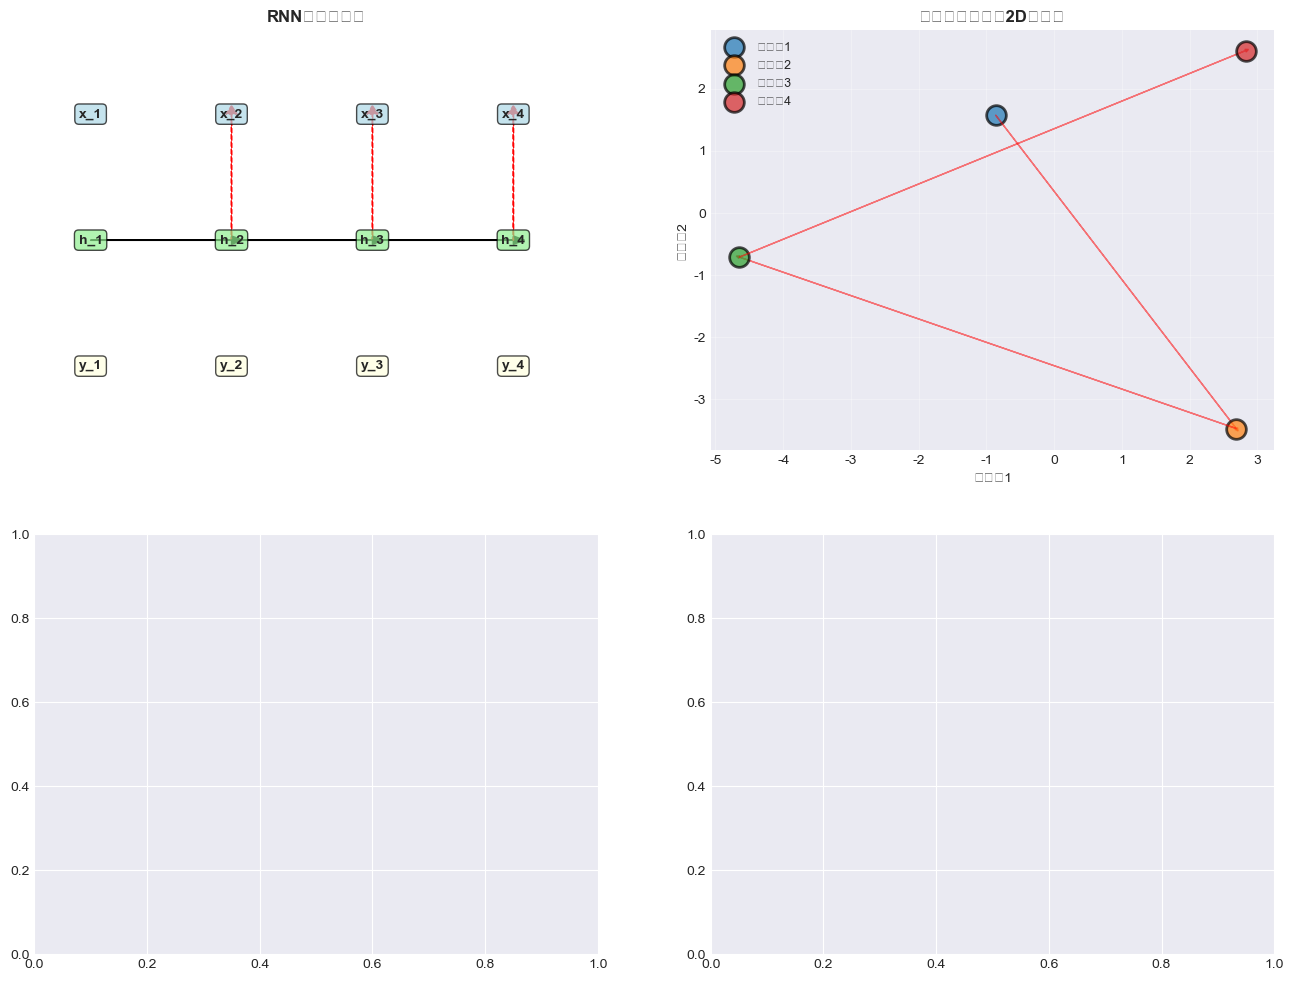

In [3]:
# ============================================
# RNN序列模型可视化（示例：VLA任务的RNN序列预测）
# ============================================
np.random.seed(42)

# 示例：VLA任务的RNN序列预测
d_input = 128  # 输入维度（多模态特征）
d_hidden = 64  # 隐藏状态维度
d_output = 4   # 输出维度（动作参数）
sequence_length = 4  # 序列长度

# 模拟RNN参数
W_h = np.random.randn(d_hidden, d_hidden) * 0.1
W_x = np.random.randn(d_hidden, d_input) * 0.1
b = np.random.randn(d_hidden) * 0.1
W_o = np.random.randn(d_output, d_hidden) * 0.1
b_o = np.random.randn(d_output) * 0.1

# 生成示例输入序列
inputs = np.random.randn(sequence_length, d_input)
h_0 = np.zeros(d_hidden)  # 初始隐藏状态

# RNN前向传播
hidden_states = []
outputs = []
h_t = h_0
for t in range(sequence_length):
    # 计算隐藏状态
    h_t = np.tanh(W_h @ h_t + W_x @ inputs[t] + b)
    hidden_states.append(h_t.copy())
    # 计算输出
    y_t = W_o @ h_t + b_o
    outputs.append(y_t.copy())

hidden_states = np.array(hidden_states)
outputs = np.array(outputs)

# 可视化
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 左上：RNN架构示意图
ax1 = axes[0, 0]
ax1.axis('off')
# 绘制RNN架构
for t in range(sequence_length):
    x_pos = 0.1 + t * 0.25
    # 输入
    ax1.text(x_pos, 0.8, f'x_{t+1}', ha='center', va='center', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    # 隐藏状态
    ax1.text(x_pos, 0.5, f'h_{t+1}', ha='center', va='center', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    # 输出
    ax1.text(x_pos, 0.2, f'y_{t+1}', ha='center', va='center', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    # 循环连接
    if t < sequence_length - 1:
        ax1.arrow(x_pos, 0.5, 0.25, 0, head_width=0.02, head_length=0.02, 
                 fc='black', ec='black')
        ax1.arrow(x_pos + 0.25, 0.5, 0, 0.3, head_width=0.02, head_length=0.02, 
                 fc='red', ec='red', linestyle='--')

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_title('RNN架构示意图', fontsize=12, fontweight='bold')

# 右上：隐藏状态演化（2D投影）
ax2 = axes[0, 1]
if hidden_states.shape[1] > 2:
    pca = PCA(n_components=2)
    hidden_states_2d = pca.fit_transform(hidden_states)
else:
    hidden_states_2d = hidden_states
for t in range(sequence_length):
    ax2.scatter(hidden_states_2d[t, 0], hidden_states_2d[t, 1], 
               s=200, alpha=0.7, edgecolors='black', linewidth=2,
               label=f'时间步{t+1}')
    if t < sequence_length - 1:
        ax2.arrow(hidden_states_2d[t, 0], hidden_states_2d[t, 1],
                 hidden_states_2d[t+1, 0] - hidden_states_2d[t, 0],
                 hidden_states_2d[t+1, 1] - hidden_states_2d[t, 1],
                 head_width=0.05, head_length=0.05, fc='red', ec='red', alpha=0.5)
ax2.set_title('隐藏状态演化（2D投影）', fontsize=12, fontweight='bold')
ax2.set_xlabel('主成分1')
ax2.set_ylabel('主成分2')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 左下：隐藏状态范数演化
ax3 = axes[1, 0]
hidden_norms = np.linalg.norm(hidden_states, axis=1)
time_steps = np.arange(1, sequence_length + 1)
ax3.plot(time_steps, hidden_norms, marker='o', linewidth=2, markersize=10, 
        color='steelblue', alpha=0.7, edgecolors='black', linewidth=2)
ax3.set_title('隐藏状态范数演化', fontsize=12, fontweight='bold')
ax3.set_xlabel('时间步')
ax3.set_ylabel('隐藏状态范数')
ax3.set_xticks(time_steps)
ax3.grid(True, alpha=0.3)

# 添加数值标注
for t, norm in enumerate(hidden_norms):
    ax3.text(time_steps[t], norm + 0.1, f'{norm:.2f}', ha='center', va='bottom',
            fontsize=10, fontweight='bold')

# 右下：输出演化
ax4 = axes[1, 1]
output_names = ['位置x', '位置y', '位置z', '抓取力度']
for i, name in enumerate(output_names):
    output_values = outputs[:, i]
    ax4.plot(time_steps, output_values, marker='o', linewidth=2, markersize=8,
            label=name, alpha=0.7)
ax4.set_title('输出演化（动作参数）', fontsize=12, fontweight='bold')
ax4.set_xlabel('时间步')
ax4.set_ylabel('输出值')
ax4.set_xticks(time_steps)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('RNN序列模型可视化：VLA任务的RNN序列预测', fontsize=14, fontweight='bold', y=1.0)
plt.show()

print("=" * 60)
print("RNN序列模型可视化说明：")
print("=" * 60)
print("1. 左上：RNN架构示意图，显示RNN的循环连接结构")
print("2. 右上：隐藏状态演化（2D投影），显示隐藏状态在向量空间中的演化")
print("3. 左下：隐藏状态范数演化，显示隐藏状态范数随时间步的变化")
print("4. 右下：输出演化，显示每个动作参数随时间步的变化")
print("=" * 60)


---

## 5. LSTM序列模型详解

### 5.1 什么是LSTM

**直观理解**：想象LSTM就像一个有选择性记忆的机器，能够选择记住重要的信息，忘记不重要的信息。

**定义**：LSTM是指具有门控机制的循环神经网络，是序列预测中常用的序列模型。

### 5.2 为什么需要LSTM

LSTM的必要性在于：

1. **处理长期依赖**：
   - 能够处理长期依赖关系，解决RNN的梯度消失问题
   - 能够记住长期的信息
   - 适合复杂的序列任务

2. **门控机制**：
   - 通过门控机制控制信息流动，提高表达能力
   - 能够选择性地记住和忘记信息
   - 适合复杂的序列模式

3. **广泛应用**：
   - 在序列任务中广泛应用
   - 性能优于RNN
   - 适合VLA任务

### 5.3 LSTM的数学推导详解

#### 5.3.1 从基础数学开始

**步骤1：理解门控机制**

门控机制是指控制信息流动的机制，包括：
- 输入门：控制新信息的输入
- 遗忘门：控制旧信息的遗忘
- 输出门：控制输出的生成

**步骤2：理解细胞状态**

细胞状态是指存储长期信息的向量：

$$c_t \in \mathbb{R}^{d_h}$$

**步骤3：理解LSTM**

LSTM的数学表示为：

$$\begin{aligned}
f_t &= \sigma(W_f [h_{t-1}, x_t] + b_f) \quad \text{(遗忘门)} \\
i_t &= \sigma(W_i [h_{t-1}, x_t] + b_i) \quad \text{(输入门)} \\
\tilde{c}_t &= \tanh(W_c [h_{t-1}, x_t] + b_c) \quad \text{(候选值)} \\
c_t &= f_t \odot c_{t-1} + i_t \odot \tilde{c}_t \quad \text{(细胞状态)} \\
o_t &= \sigma(W_o [h_{t-1}, x_t] + b_o) \quad \text{(输出门)} \\
h_t &= o_t \odot \tanh(c_t) \quad \text{(隐藏状态)}
\end{aligned}$$

其中$\sigma$是sigmoid函数，$\odot$是逐元素乘法。

#### 5.3.2 LSTM的具体计算示例

**示例：LSTM计算**

假设：
- 隐藏状态维度：$d_h = 64$
- 输入维度：$d_x = 128$
- 当前输入：$x_t \in \mathbb{R}^{128}$
- 上一个隐藏状态：$h_{t-1} \in \mathbb{R}^{64}$
- 上一个细胞状态：$c_{t-1} \in \mathbb{R}^{64}$

**步骤1：计算遗忘门**

$$f_t = \sigma(W_f [h_{t-1}, x_t] + b_f)$$

其中$W_f \in \mathbb{R}^{64 \times (64+128)}$，$b_f \in \mathbb{R}^{64}$。

**步骤2：计算输入门和候选值**

$$i_t = \sigma(W_i [h_{t-1}, x_t] + b_i)$$
$$\tilde{c}_t = \tanh(W_c [h_{t-1}, x_t] + b_c)$$

**步骤3：更新细胞状态**

$$c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t$$

**步骤4：计算输出门和隐藏状态**

$$o_t = \sigma(W_o [h_{t-1}, x_t] + b_o)$$
$$h_t = o_t \odot \tanh(c_t)$$

### 5.4 LSTM vs RNN

| 特性 | LSTM | RNN |
|------|------|-----|
| **长期依赖** | 能够处理长期依赖 | 难以处理长期依赖 |
| **梯度消失** | 解决梯度消失问题 | 容易出现梯度消失 |
| **门控机制** | 有门控机制 | 无门控机制 |
| **计算复杂度** | 较高 | 较低 |
| **表达能力** | 较强 | 较弱 |

---

## 6. 序列损失函数详解

### 6.1 什么是序列损失函数

**直观理解**：想象序列损失函数就像衡量整个动作序列预测的准确性，例如，衡量"移动到杯子位置"、"抓取杯子"、"移动到桌子位置"、"放下杯子"这个序列的预测准确性。

**定义**：序列损失函数是指用于训练序列预测模型的损失函数，是序列预测的核心组件。

### 6.2 为什么需要序列损失函数

序列损失函数的必要性在于：

1. **逐步优化**：
   - 能够逐步优化每个时间步的预测
   - 能够捕获动作之间的时序依赖关系
   - 适合序列预测任务

2. **端到端训练**：
   - 能够与VLA模型的其他模块一起端到端训练
   - 能够学习最适合任务的特征表示
   - 能够优化整体性能

3. **灵活设计**：
   - 能够根据任务特点设计不同的损失函数
   - 能够对不同时间步的损失进行权重调整
   - 适合各种序列任务

### 6.3 序列损失函数的数学推导详解

#### 6.3.1 从基础数学开始

**步骤1：理解时间步损失**

时间步损失是指每个时间步的预测误差：

$$\mathcal{L}_t = \text{loss}(a_t, \hat{a}_t)$$

其中$a_t$是预测动作，$\hat{a}_t$是真实动作。

**步骤2：理解序列损失**

序列损失是对所有时间步的损失进行求和或平均：

$$\mathcal{L} = \frac{1}{T}\sum_{t=1}^{T} \mathcal{L}_t$$

其中$T$是序列长度。

**步骤3：理解加权序列损失**

加权序列损失是对不同时间步的损失进行权重调整：

$$\mathcal{L} = \sum_{t=1}^{T} w_t \mathcal{L}_t$$

其中$w_t$是时间步$t$的权重。

#### 6.3.2 序列损失函数的具体计算示例

**示例：计算序列损失**

假设：
- 序列长度：$T = 4$
- 动作维度：$d_{action} = 4$
- 真实动作：$\hat{A} = [\hat{a}_1, \hat{a}_2, \hat{a}_3, \hat{a}_4]$
- 预测动作：$A = [a_1, a_2, a_3, a_4]$

**步骤1：计算每个时间步的损失**

对于离散动作（使用交叉熵损失）：
$$\mathcal{L}_t = -\log(P(a_t = \hat{a}_t))$$

对于连续动作（使用均方误差损失）：
$$\mathcal{L}_t = \|a_t - \hat{a}_t\|^2$$

**步骤2：计算序列损失**

$$\mathcal{L} = \frac{1}{4}\sum_{t=1}^{4} \mathcal{L}_t$$

### 6.4 序列损失函数的可视化

下面我们通过代码可视化序列损失函数的过程：


In [ ]:
# ============================================
# 序列损失函数可视化（示例：VLA任务的序列损失函数）
# ============================================
np.random.seed(42)

# 示例：VLA任务的序列损失函数
sequence_length = 4
action_dim = 4

# 模拟真实动作和预测动作
true_actions = np.random.randn(sequence_length, action_dim) * 0.2
predicted_actions = true_actions + np.random.randn(sequence_length, action_dim) * 0.05

# 计算每个时间步的损失（均方误差）
losses_per_step = np.mean((true_actions - predicted_actions) ** 2, axis=1)
sequence_loss = np.mean(losses_per_step)

# 计算累积损失
cumulative_losses = np.cumsum(losses_per_step)

# 可视化
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 左上：每个时间步的损失
ax1 = axes[0, 0]
time_steps = np.arange(1, sequence_length + 1)
bars = ax1.bar(time_steps, losses_per_step, color='steelblue', alpha=0.7, 
              edgecolor='black', linewidth=2)
ax1.set_title('每个时间步的损失', fontsize=12, fontweight='bold')
ax1.set_xlabel('时间步')
ax1.set_ylabel('损失值')
ax1.set_xticks(time_steps)
ax1.grid(True, alpha=0.3, axis='y')

# 添加数值标注
for t, (bar, loss) in enumerate(zip(bars, losses_per_step)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{loss:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 添加平均线
ax1.axhline(y=sequence_loss, color='red', linestyle='--', linewidth=2,
           label=f'平均损失: {sequence_loss:.4f}')
ax1.legend()

# 右上：累积损失
ax2 = axes[0, 1]
ax2.plot(time_steps, cumulative_losses, marker='o', linewidth=2, markersize=10,
        color='steelblue', alpha=0.7, edgecolors='black', linewidth=2)
ax2.set_title('累积损失', fontsize=12, fontweight='bold')
ax2.set_xlabel('时间步')
ax2.set_ylabel('累积损失')
ax2.set_xticks(time_steps)
ax2.grid(True, alpha=0.3)

# 添加数值标注
for t, cum_loss in enumerate(cumulative_losses):
    ax2.text(time_steps[t], cum_loss + 0.01, f'{cum_loss:.4f}', ha='center', va='bottom',
            fontsize=10, fontweight='bold')

# 左下：预测误差（所有维度）
ax3 = axes[1, 0]
errors = np.abs(predicted_actions - true_actions)
mean_errors = np.mean(errors, axis=0)
std_errors = np.std(errors, axis=0)
x_pos = np.arange(action_dim)
bars = ax3.bar(x_pos, mean_errors, yerr=std_errors, color='orange', 
              alpha=0.7, edgecolor='black', linewidth=2, capsize=5)
ax3.set_title('所有维度的预测误差', fontsize=12, fontweight='bold')
ax3.set_xlabel('动作维度')
ax3.set_ylabel('平均绝对误差')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(['位置x', '位置y', '位置z', '抓取力度'], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# 添加数值标注
for i, (bar, mean_err, std_err) in enumerate(zip(bars, mean_errors, std_errors)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + std_err + 0.01,
             f'{mean_err:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 右下：序列损失函数计算过程
ax4 = axes[1, 1]
ax4.axis('off')
ax4.text(0.5, 0.9, '序列损失函数计算', fontsize=14, fontweight='bold', 
        ha='center', va='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
y_pos = 0.75
ax4.text(0.5, y_pos, f'总体序列损失: {sequence_loss:.6f}', fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
y_pos -= 0.15
ax4.text(0.5, y_pos, '各时间步损失:', fontsize=11, fontweight='bold', ha='center', va='center')
y_pos -= 0.1
for t, loss in enumerate(losses_per_step):
    y_pos -= 0.08
    ax4.text(0.5, y_pos, f'时间步{t+1}: {loss:.6f}', fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))

ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.suptitle('序列损失函数可视化：VLA任务的序列损失函数', fontsize=14, fontweight='bold', y=1.0)
plt.show()

print("=" * 60)
print("序列损失函数可视化说明：")
print("=" * 60)
print("1. 左上：每个时间步的损失，显示不同时间步的损失值")
print("2. 右上：累积损失，显示累积损失随时间步的变化")
print("3. 左下：所有维度的预测误差，显示每个维度的平均绝对误差")
print("4. 右下：序列损失函数计算过程，显示总体和各个时间步的损失")
print("=" * 60)


---

## 7. 序列预测在VLA中的应用

### 7.1 序列预测在VLA中的角色

在VLA中，序列预测用于预测动作序列，生成连续的动作步骤。VLA模型使用序列预测方法从多模态特征中预测应该执行的动作序列，然后按顺序执行这些动作。

### 7.2 序列预测在VLA中的优势

序列预测在VLA中的优势包括：

1. **捕获时序依赖**：能够捕获动作之间的时序依赖关系，这对于完成复杂任务非常重要
2. **逐步生成**：能够逐步生成动作序列，适合序列生成任务
3. **端到端训练**：能够与VLA模型的其他模块一起端到端训练，优化整体性能
4. **处理复杂任务**：能够处理需要多个步骤的复杂任务，适合复杂的VLA任务

### 7.3 序列预测在VLA中的使用流程

**步骤1：定义序列结构**

定义动作序列的结构，包括序列长度和动作类型：

```python
sequence_structure = {
    'max_length': 10,  # 最大序列长度
    'action_types': ['移动', '抓取', '放置', '旋转', '停止'],
}
```

**步骤2：创建序列模型**

创建序列模型（如RNN、LSTM），处理序列信息：

```python
class SequencePredictor(nn.Module):
    def __init__(self, d_input, d_hidden, d_output):
        super().__init__()
        self.rnn = nn.LSTM(d_input, d_hidden, batch_first=True)
        self.fc = nn.Linear(d_hidden, d_output)
    
    def forward(self, multimodal_features):
        # RNN处理
        h, _ = self.rnn(multimodal_features)
        # 输出预测
        outputs = self.fc(h)
        return outputs
```

**步骤3：训练序列模型**

使用序列损失函数训练序列模型：

```python
# 获取预测序列
predicted_sequence = sequence_predictor(multimodal_features)

# 计算序列损失
loss = sequence_loss(predicted_sequence, true_sequence)

# 反向传播
loss.backward()
optimizer.step()
```

**步骤4：动作执行**

按顺序执行预测的动作序列：

```python
# 执行动作序列
for action in predicted_sequence:
    execute_action(action)
```

### 7.4 序列预测在VLA中的典型应用

#### 7.4.1 多步骤操作任务

**应用场景**：机器人多步骤操作任务

**任务示例**：
```python
task = "拿起杯子放到桌子上"
action_sequence = [
    '移动到杯子位置',
    '抓取杯子',
    '移动到桌子位置',
    '放下杯子',
]
```

**优势**：
- 能够捕获动作之间的时序依赖关系
- 能够生成正确的动作序列
- 适合复杂的操作任务

#### 7.4.2 长期规划任务

**应用场景**：机器人长期规划任务

**任务示例**：
```python
task = "整理房间"
action_sequence = [
    '移动到桌子',
    '拿起书本',
    '移动到书架',
    '放置书本',
    '移动到床',
    '整理床铺',
    # ... 更多步骤
]
```

**优势**：
- 能够处理长期的动作序列
- 能够进行长期的动作规划
- 适合复杂的规划任务

---

## 8. 总结

### 8.1 序列预测的核心思想

序列预测的核心思想包括：

1. **时序依赖**：捕获动作之间的时序依赖关系
2. **自回归生成**：使用自回归方式逐步生成动作序列
3. **序列模型**：使用序列模型（如RNN、LSTM）处理序列信息
4. **序列损失**：使用序列损失函数训练模型

### 8.2 序列预测的优势

序列预测的优势包括：

1. **捕获时序依赖**：能够捕获动作之间的时序依赖关系
2. **逐步生成**：能够逐步生成动作序列，适合序列生成任务
3. **端到端训练**：能够与VLA模型的其他模块一起端到端训练
4. **处理复杂任务**：能够处理需要多个步骤的复杂任务

### 8.3 序列预测在VLA中的重要性

序列预测在VLA中的重要性体现在：

1. **复杂任务的基础**：序列预测是处理复杂任务的基础，是VLA动作预测的重要方法
2. **时序依赖**：能够捕获动作之间的时序依赖关系，这对于完成复杂任务非常重要
3. **逐步生成**：能够逐步生成动作序列，适合序列生成任务
4. **应用广泛**：在VLA中应用广泛，是VLA动作预测的重要方法

### 8.4 学习建议

1. **理解基础概念**：深入理解序列预测、自回归、RNN、LSTM等基础概念
2. **掌握数学原理**：掌握序列预测的数学原理和实现方法
3. **实践设计**：通过实践设计不同任务的序列预测模型，理解设计原则
4. **对比学习**：对比序列预测和单步预测，理解各自的适用场景

---

## 📝 文档信息

- **创建时间**：2024年
- **文档版本**：v1.0
- **维护者**：VLA学习团队
- **相关文档**：
  - [动作执行基础详解](../../理论笔记/动作执行基础详解.ipynb)
  - [动作序列详解](../../01_动作表示/03_动作序列/理论笔记/动作序列详解.ipynb)
  - [分类方法详解](../01_分类方法/理论笔记/分类方法详解.ipynb)
  - [回归方法详解](../02_回归方法/理论笔记/回归方法详解.ipynb)
